In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.90'

In [2]:
# Get from here - https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Fluid_Inclusion_Densities_Example1.xlsx
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()
kamaehu_averaged=df
df2=df
df2.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.477880,1048.898738,0.897797
1,FI2,0.495756,1015.924767,0.831850
2,FI4,0.409078,1041.589916,0.883180
3,FI5,0.425325,1034.935183,0.869870
4,FI7,0.461696,1034.820102,0.869640


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
Number of processors:  8


c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\error_propagation.py:728: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DZ06' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_step.at[i, key] = value


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,error_XH2O,XH2O
0,FI1,0.0,0.477880,7.532319,1.995085,1.996942,1.980015,0.277087,0.271601,7.518468,...,1322.048738,104.889874,0.477880,0.023894,2700.0,5.0,NaN,DZ06,0.05,0.076106
1,FI2,1.0,0.495756,7.710621,2.042312,2.054500,2.023019,0.289598,0.284415,7.735202,...,1289.074767,101.592477,0.495756,0.024788,2700.0,5.0,NaN,DZ06,0.05,0.075212
2,FI4,2.0,0.409078,5.903795,1.563738,1.570396,1.553851,0.213311,0.204827,5.912620,...,1314.739916,104.158992,0.409078,0.020454,2700.0,5.0,NaN,DZ06,0.05,0.079546
3,FI5,3.0,0.425325,6.215078,1.646188,1.653540,1.635503,0.226732,0.216780,6.225607,...,1308.085183,103.493518,0.425325,0.021266,2700.0,5.0,NaN,DZ06,0.05,0.078734
4,FI7,4.0,0.461696,7.041722,1.865141,1.869814,1.852588,0.257632,0.253376,7.039669,...,1307.970102,103.482010,0.461696,0.023085,2700.0,5.0,NaN,DZ06,0.05,0.076915


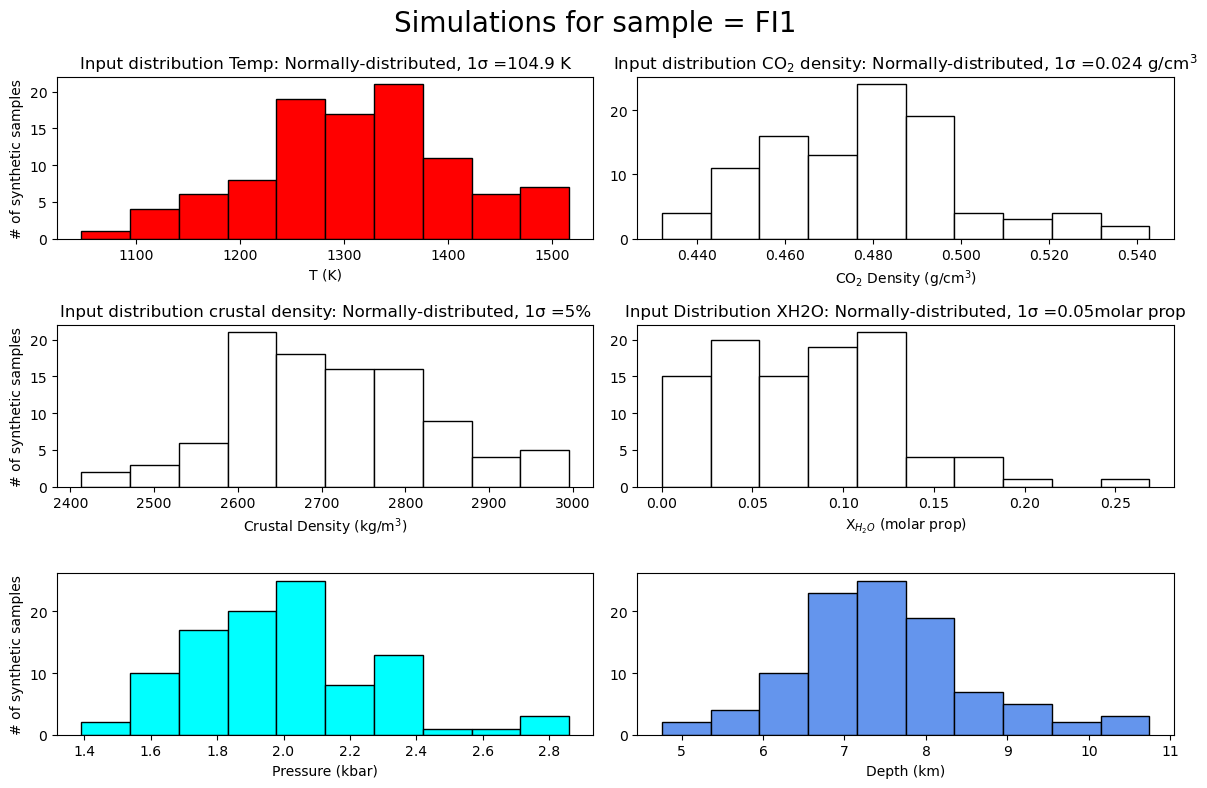

In [3]:

MC_Av_rho_T_CDH_mp, MC_All_rho_T_CDH_mp, fig =pf.propagate_FI_uncertainty(multiprocess=True, T_K=df['T_C']+273.15,
error_CO2_dens=df2['Density_g_cm3']*0.05, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=df2['T_C']*0.1, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df2['Density_g_cm3'],
XH2O=0.1-df2['Density_g_cm3']*0.05, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
sample_ID=df2['Sample'],
N_dup=100, fig_i=0, plot_figure=True)
MC_Av_rho_T_CDH_mp.head()

In [10]:
MC_Av_rho_T_CDH_mp.to_clipboard(excel=True)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
If calculations are taking a long time, set multiprocess=True in the function - it should really speed it up


Processing: 100%|██████████| 60/60 [00:23<00:00,  2.53it/s]


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,error_XH2O,XH2O
0,FI1,0.0,0.477880,7.532319,1.995085,1.996942,1.980015,0.277087,0.271601,7.518468,...,1322.048738,104.889874,0.477880,0.023894,2700.0,5.0,NaN,DZ06,0.05,0.076106
1,FI2,1.0,0.495756,7.710621,2.042312,2.054500,2.023019,0.289598,0.284415,7.735202,...,1289.074767,101.592477,0.495756,0.024788,2700.0,5.0,NaN,DZ06,0.05,0.075212
2,FI4,2.0,0.409078,5.903795,1.563738,1.570396,1.553851,0.213311,0.204827,5.912620,...,1314.739916,104.158992,0.409078,0.020454,2700.0,5.0,NaN,DZ06,0.05,0.079546
3,FI5,3.0,0.425325,6.215078,1.646188,1.653540,1.635503,0.226732,0.216780,6.225607,...,1308.085183,103.493518,0.425325,0.021266,2700.0,5.0,NaN,DZ06,0.05,0.078734
4,FI7,4.0,0.461696,7.041722,1.865141,1.869814,1.852588,0.257632,0.253376,7.039669,...,1307.970102,103.482010,0.461696,0.023085,2700.0,5.0,NaN,DZ06,0.05,0.076915


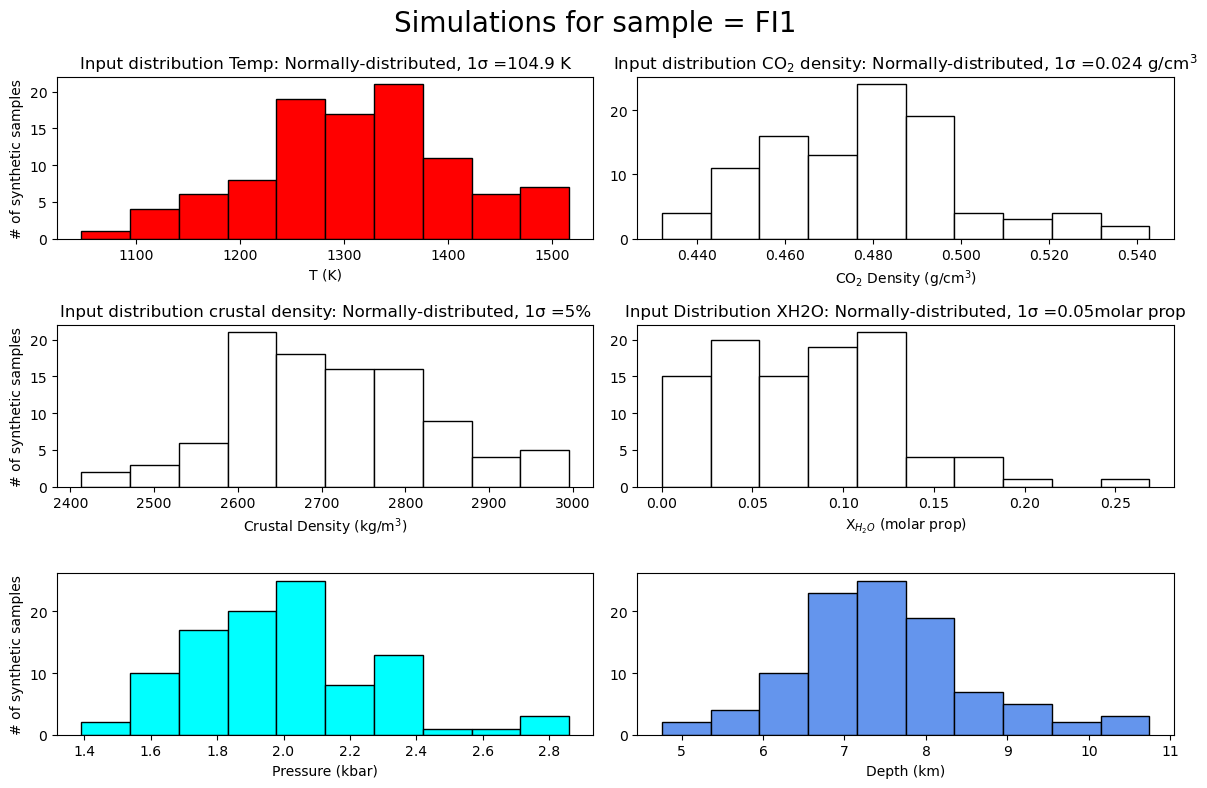

In [5]:

MC_Av_rho_T_CDH_nomp, MC_All_rho_T_CDH_nomp, fig =pf.propagate_FI_uncertainty(multiprocess=False, T_K=df['T_C']+273.15,
error_CO2_dens=df2['Density_g_cm3']*0.05, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=df2['T_C']*0.1, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df2['Density_g_cm3'],
XH2O=0.1-df2['Density_g_cm3']*0.05, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
sample_ID=df2['Sample'],
N_dup=100, fig_i=0, plot_figure=True)
MC_Av_rho_T_CDH_mp.head()

In [9]:
MC_Av_rho_T_CDH_nomp.to_clipboard(excel=True)